# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [2]:
N = 6 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

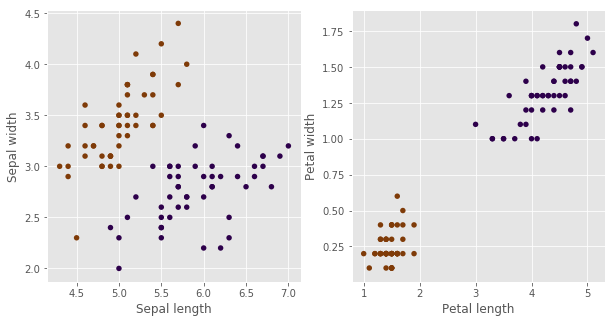

In [4]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

## Задание 1

In [5]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import KMeans
from __future__ import division

class Clustering(BaseEstimator, ClusterMixin):
    
    def __init__(self, n_clusters = 2, max_iter = 100, tol = 1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
    
    def distribution(self, x, mu, sigma):
        
        det_tol = 1e-15 # Значение определителя, при котором требуется корректировать сигму
        det_term = 1e-2 # На сколько будет увеличиваться диагональ
        
        if (np.linalg.det(sigma) < det_tol):
            sigma += np.eye(sigma.shape[0]) * det_term
            
        return (np.exp((-0.5 * (x - mu).dot(np.linalg.inv(sigma)) * (x - mu)).sum(axis = 1))) / np.sqrt(
                                                                                            np.linalg.det(sigma))
        
    def expectation(self, X):
        for k in range(self.n_clusters):
            self.gamma_[:,k] = self.pie_[k] * self.distribution(X, self.mu_[k,:], self.sigma_[:,:,k])
        self.gamma_ /= self.gamma_.sum(axis = 1)[:,np.newaxis]
        
        
    def maximization(self, X):
        N = self.gamma_.sum(axis = 0)
        self.sigma_.fill(0)
        for k in range(self.n_clusters):
            self.mu_[k,:] = 1 / N[k] * ((X * self.gamma_[:, k, np.newaxis]).sum(axis = 0))
            self.sigma_[:,:,k] = np.einsum('ij,ik->jk', X - self.mu_[k], 
                                           (X - self.mu_[k]) * self.gamma_[:,k].reshape(-1,1)) / N[k]
            self.pie_[k] = N[k] / X.shape[0]
        
        
    def fit(self, X):
        kmeans = KMeans(n_clusters = self.n_clusters, random_state=0).fit(X)
        self.mu_ = kmeans.cluster_centers_
        
        self.sigma_ = np.empty([X.shape[1], X.shape[1], self.n_clusters])
        self.pie_ = np.empty(self.n_clusters)
        self.gamma_ = np.empty((X.shape[0],self.n_clusters))
        self.gamma_.fill(1./self.n_clusters)
        mu_prev = kmeans.cluster_centers_
        
        for k in range(self.n_clusters):
            self.sigma_[:,:,k] = np.einsum('ij,ik->jk', 
                                           X[kmeans.labels_ == k] - self.mu_[k,:],
                                           X[kmeans.labels_ == k] - self.mu_[k,:])
            self.sigma_[:,:,k] /= X[kmeans.labels_ == k].shape[0]
            self.pie_[k] = X[kmeans.labels_ == k].shape[0] / X.shape[0]
        
        i = 0
        while(i < self.max_iter):
            self.expectation(X)
            self.maximization(X)
            criteria = ((self.mu_ - mu_prev)**2).sum() 
            if criteria < self.tol:
                return self
            mu_prev = self.mu_.copy()
            i += 1
        return self
    
    def predict_proba(self, X):
        for k in range(self.n_clusters):
            self.gamma_[:,k] = self.pie_[k] * self.distribution(X, self.mu_[k,:], self.sigma_[:,:,k])
        self.gamma_ /= self.gamma_.sum(axis = 1)[:,np.newaxis]
        return self.gamma_
    
    def predict(self, X):
        return self.predict_proba(X).argmax(axis=1)
    
    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

In [6]:
pred_iris = Clustering(n_clusters = 2).fit(x_iris)
that_iris = pred_iris.predict(x_iris)

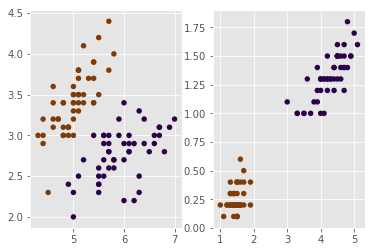

In [7]:
pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=that_iris, cmap=pl.cm.PuOr, lw=0, s=30)
pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=that_iris, cmap=pl.cm.PuOr, lw=0, s=30)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [8]:
pred_iris = Clustering(n_clusters = 2).fit(x_iris)

In [9]:
pred_iris = Clustering(n_clusters = 2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


## Задание 2

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [10]:
## Задание 2
def quality(x, y):
    quality_array = np.empty(x.shape[0])
    for obj in xrange(x.shape[0]):
        b = 100000.0
        if(x[y == y[obj]].shape[0] == 1):
            quality_array[obj] = 0
            continue
        for cluster in list(set(y)):
            tempdist = np.sqrt(((x[obj]-x[y==cluster])**2).sum(axis=1)).mean(axis=0)
            if(y[obj] == cluster):
                a = tempdist * (x[y == cluster]).shape[0] / ((x[y == cluster]).shape[0] - 1)
            elif tempdist < b:
                b = tempdist
        quality_array[obj] = (b-a)/ max([a,b])
    return quality_array.mean()

In [11]:
quality(x_iris,pred_iris)

0.7369368160680051

Протестируем

In [12]:
from sklearn.metrics import silhouette_score
silhouette_score(x_iris, pred_iris)

0.73693681602317374

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [13]:
x=x_iris
y=pred_iris

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

2 0.736936816068
3 0.57853353359
4 0.375447429463
5 0.370822300444
6 0.358944995507
7 0.326268295905
8 0.290642706007
9 0.281480063376
10 0.287881379066
11 0.27982426146
12 0.275060529222
13 0.2807755124
14 0.268761320141
15 0.255802158009


/home/vladimir/anaconda2/lib/python2.7/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


16 0.256746383008
17 0.27371954286
18 0.259694413748
19 0.26227136419
20 0.303590845613


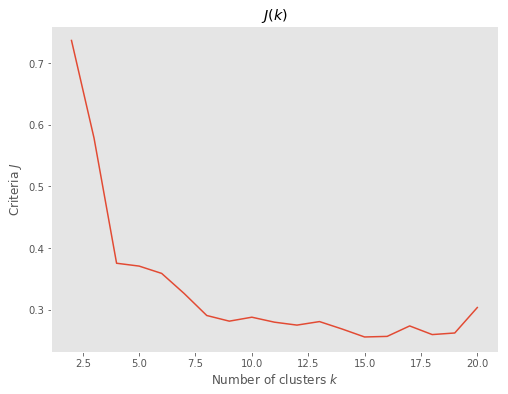

In [15]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters = k)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    print k, criteria[i]
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

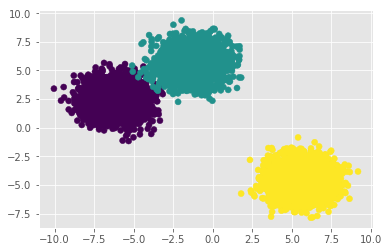

In [16]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=10000, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)
plt.scatter(x[:,0], x[:, 1], c=y)

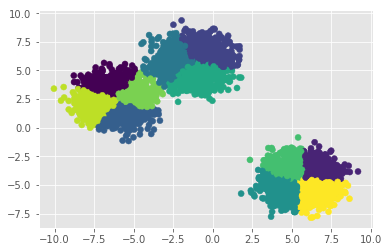

In [17]:
cls = Clustering(n_clusters = 11)
y = cls.fit_predict(x)
plt.scatter(x[:,0], x[:, 1], c=y)

## Задание 3

In [18]:
df = pd.read_csv('WDIData.csv', sep=',')

In [19]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.831932,83.474617,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.042248,84.655338,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.292323,71.765345,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [20]:
df.count(axis=0)

Country Name      409992
Country Code      409992
Indicator Name    409992
Indicator Code    409992
1960               38936
1961               42817
1962               44990
1963               45037
1964               45556
1965               48457
1966               48118
1967               49844
1968               49457
1969               51174
1970               93612
1971               99910
1972              102879
1973              102425
1974              103924
1975              108085
1976              110503
1977              114472
1978              114076
1979              114859
1980              119616
1981              121580
1982              123114
1983              122918
1984              123687
1985              124986
                   ...  
1988              126793
1989              128139
1990              154158
1991              153590
1992              158328
1993              159689
1994              161649
1995              171075
1996              171584


Пусть будет 2010й, раз там больше всего данных. Выкинем лишние столбцы

In [21]:
df.columns[4:54]

Index([u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009'],
      dtype='object')

In [22]:
df = df.drop(df.columns[4:54],axis=1)

In [23]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,84.006076,84.416148,84.734574,85.003645,85.244971,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.955345,86.392313,86.846966,87.604961,88.039125,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,73.734266,74.500717,75.218497,76.712250,77.407269,NaN,NaN,NaN


In [24]:
df = df.drop(df.columns[5:12],axis=1)

In [25]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,84.006076
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,85.955345
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,73.734266


In [26]:
df = df.drop(df.columns[1:3],axis=1)

In [27]:
df.head()

,Country Name,Indicator Code,2010
0,Arab World,PA.NUS.PPP.05,NaN
1,Arab World,PA.NUS.PRVT.PP.05,NaN
2,Arab World,EG.CFT.ACCS.ZS,84.006076
3,Arab World,EG.ELC.ACCS.ZS,85.955345
4,Arab World,EG.ELC.ACCS.RU.ZS,73.734266


Сделаем столбцы из индикаторов

In [28]:
df=df.pivot(index='Country Name', columns='Indicator Code',values = '2010')
df.head()

Indicator Code,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,275.819331,4.254972,379100.0,58.067580,7793000.0,0.270561,11.936709,2962000.0,0.180743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,97.322684,12013.0,43.843066,626000.0,0.214897,22.846715,145700.0,2.554745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,457.433490,19.481472,413740.0,17.371334,7502000.0,0.207710,3.149798,2856586.0,0.381654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,NaN,NaN,NaN,49.0,24.500000,3000.0,0.053921,15.000000,NaN,9.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,201.0,42.765957,2500.0,0.029604,5.319149,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим не страны

In [29]:
to_delete = df.index.isin(['Arab World','Not classified',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'Heavily indebted poor countries (HIPC)',
 'IDA only',
 'IDA total',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Least developed countries: UN classification',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Middle East & North Africa (excluding high income)',
 'Pre-demographic dividend', 'South Asia',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',u'East Asia & Pacific', u'Euro area', u'Europe & Central Asia', u'European Union', u'High income', u'IBRD only', u'IDA & IBRD total', u'Late-demographic dividend', u'Low & middle income', u'Middle income',u'OECD members', u'Post-demographic dividend', u'Upper middle income', u'World',u'Early-demographic dividend',u'East Asia & Pacific (IDA & IBRD countries)',u'East Asia & Pacific (excluding high income)', u'Lower middle income',u'North America'])

/home/vladimir/anaconda2/lib/python2.7/site-packages/pandas/core/algorithms.py:399: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  f = lambda x, y: htable.ismember_object(x, values)


In [30]:
df = df[map(lambda x: not x,to_delete)]

Теперь выкинем индикаторы без значений или с малым их числом

In [31]:
df.count(axis=0)

Indicator Code
AG.AGR.TRAC.NO                0
AG.CON.FERT.PT.ZS            85
AG.CON.FERT.ZS              168
AG.LND.AGRI.K2              217
AG.LND.AGRI.ZS              217
AG.LND.ARBL.HA              207
AG.LND.ARBL.HA.PC           215
AG.LND.ARBL.ZS              215
AG.LND.CREL.HA              187
AG.LND.CROP.ZS              205
AG.LND.EL5M.RU.K2           187
AG.LND.EL5M.RU.ZS           185
AG.LND.EL5M.UR.K2           187
AG.LND.EL5M.UR.ZS           185
AG.LND.EL5M.ZS              185
AG.LND.FRST.K2              218
AG.LND.FRST.ZS              218
AG.LND.IRIG.AG.ZS            70
AG.LND.PRCP.MM                0
AG.LND.TOTL.K2              224
AG.LND.TOTL.RU.K2           187
AG.LND.TOTL.UR.K2           187
AG.LND.TRAC.ZS                0
AG.PRD.CREL.MT              187
AG.PRD.CROP.XD              208
AG.PRD.FOOD.XD              210
AG.PRD.LVSK.XD              209
AG.SRF.TOTL.K2              224
AG.YLD.CREL.KG              187
BG.GSR.NFSV.GD.ZS           184
                         

In [32]:
df.count(axis=0).index[(df.count(axis=0)<200)]

Index([u'AG.AGR.TRAC.NO', u'AG.CON.FERT.PT.ZS', u'AG.CON.FERT.ZS',
       u'AG.LND.CREL.HA', u'AG.LND.EL5M.RU.K2', u'AG.LND.EL5M.RU.ZS',
       u'AG.LND.EL5M.UR.K2', u'AG.LND.EL5M.UR.ZS', u'AG.LND.EL5M.ZS',
       u'AG.LND.IRIG.AG.ZS',
       ...
       u'per_sa_allsa.cov_q4_tot', u'per_sa_allsa.cov_q5_tot',
       u'per_si_allsi.adq_pop_tot', u'per_si_allsi.ben_q1_tot',
       u'per_si_allsi.cov_pop_tot', u'per_si_allsi.cov_q1_tot',
       u'per_si_allsi.cov_q2_tot', u'per_si_allsi.cov_q3_tot',
       u'per_si_allsi.cov_q4_tot', u'per_si_allsi.cov_q5_tot'],
      dtype='object', name=u'Indicator Code', length=1369)

In [33]:
df = df.drop(df.count(axis=0).index[(df.count(axis=0)<200)],axis=1)

In [34]:
df.index[(df.count(axis=1)<170)]

Index([u'American Samoa', u'Andorra', u'Aruba', u'Bermuda',
       u'British Virgin Islands', u'Caribbean small states', u'Cayman Islands',
       u'Central Europe and the Baltics', u'Channel Islands', u'Curacao',
       u'Dominica', u'Faroe Islands',
       u'Fragile and conflict affected situations', u'French Polynesia',
       u'Gibraltar', u'Greenland', u'Guam', u'Hong Kong SAR, China',
       u'IDA blend', u'Isle of Man', u'Korea, Dem. People’s Rep.', u'Kosovo',
       u'Liechtenstein', u'Low income', u'Macao SAR, China',
       u'Marshall Islands', u'Monaco', u'Nauru', u'New Caledonia',
       u'Northern Mariana Islands', u'Other small states',
       u'Pacific island small states', u'Palau', u'Puerto Rico', u'San Marino',
       u'Sint Maarten (Dutch part)', u'Small states', u'Somalia',
       u'South Sudan', u'St. Kitts and Nevis', u'St. Martin (French part)',
       u'Syrian Arab Republic', u'Turks and Caicos Islands', u'Tuvalu',
       u'Virgin Islands (U.S.)'],
      dtype='

In [35]:
df = df[df.count(axis = 1) >= 170]

К сожалению, страны с малым числом известных компонент тоже придется выкинуть, нормально кластеризовать все равно не выйдет. Иначе они выделятся в отдельный кластер, что логично, но не идеально.

In [36]:
df=df.fillna(0)

In [37]:
#Нормируем
df=(df-df.mean(axis=0))/df.std(axis=0)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca.fit(df.values)
PC = pca.transform(df.values)

2 0.255681326301
3 0.266347978085
4 0.218579210296
5 0.223451706491
6 0.14711294179
7 0.180326671386
8 0.133347882012
9 0.146822670875
10 0.134660634577
11 0.120572747433
12 0.157835371849
13 0.11243987279
14 0.0970347715829
15 0.113827558172
16 0.128162193014
17 0.111586148095
18 0.104913180882
19 0.0982395028496
20 0.101806935522


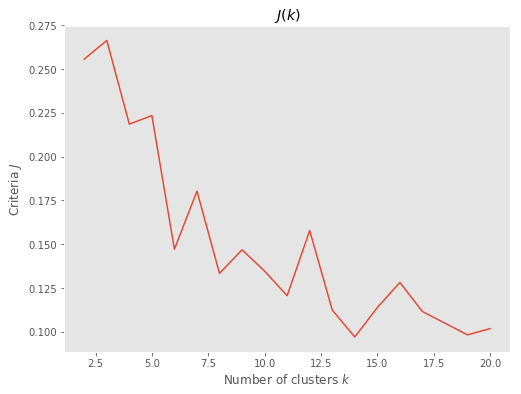

In [39]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters = k)
    y = cls.fit_predict(PC)
    criteria[i] = quality(PC, y)
    print k, criteria[i]
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [40]:
cls = Clustering(n_clusters = 3).fit_predict(PC)
df= df.assign(Type=cls)

In [41]:
df[df.Type==0]

Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,...,ST.INT.ARVL,TG.VAL.TOTL.GD.ZS,TM.QTY.MRCH.XD.WD,TM.VAL.MRCH.CD.WT,TM.VAL.MRCH.XD.WD,TT.PRI.MRCH.XD.WD,TX.QTY.MRCH.XD.WD,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.XD.WD,Type
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.166332,0.855940,0.006057,0.178955,-0.209668,-0.583042,-0.257008,-1.255211,-0.031509,0.664349,...,-0.454006,-0.939090,0.620805,-0.342548,0.651145,0.629841,-0.365070,-0.389000,-0.219515,0
Angola,0.469418,0.337363,-0.165176,-0.188804,-0.843469,-0.574675,0.447976,0.648832,0.280455,2.986806,...,-0.414702,0.457236,1.860932,-0.290926,1.319231,2.026321,0.336499,-0.147126,0.995844,0
Bangladesh,-0.257944,1.452650,0.005964,-0.669166,3.302008,0.441137,-0.255872,-0.872619,-0.306096,0.865713,...,-0.425985,-0.759852,-0.300904,-0.240911,-0.109335,-1.399960,0.516238,-0.298401,-0.159713,0
Belize,-0.392379,-1.507251,-0.351803,0.034514,-0.843516,-0.385899,-0.256497,1.247191,-0.362496,-0.787504,...,-0.431626,0.552104,-1.101718,-0.362495,-1.194801,-0.452656,-0.210367,-0.388567,-0.351619,0
Benin,-0.343794,-0.416517,-0.237509,0.200408,0.566385,-0.111505,-0.217384,0.374559,-0.315242,0.256967,...,-0.435603,-0.548842,-0.060616,-0.356450,0.023506,-0.019442,-0.114081,-0.384697,-0.069156,0
Bhutan,-0.387007,-1.195176,-0.350616,-0.332597,-0.891065,-0.559722,-0.240283,1.670726,-0.354455,-0.709665,...,-0.450215,0.837600,0.733819,-0.361831,0.948979,0.376112,0.547934,-0.387782,0.940809,0
Bolivia,0.160501,-0.226115,-0.156042,0.807954,-0.793786,-0.579588,0.419952,0.860255,0.194615,0.131749,...,-0.391212,-0.155526,-0.082739,-0.340593,-0.155937,0.862724,0.203178,-0.360029,0.592619,0
Botswana,-0.011983,0.281788,-0.343272,-0.370142,-1.050998,-0.611629,-0.133595,-0.492528,-0.076756,-0.655094,...,-0.271543,0.438907,-0.274372,-0.340295,-0.360732,-0.801924,-0.313339,-0.368261,-0.586600,0
Burkina Faso,-0.215929,0.213461,-0.077079,0.619445,0.522712,-0.565032,-0.203958,-0.466286,-0.230747,0.550130,...,-0.428667,-0.767550,0.032986,-0.356475,0.024539,0.104539,1.224658,-0.383206,1.414306,0


In [42]:
df[df.Type == 1]

Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,...,ST.INT.ARVL,TG.VAL.TOTL.GD.ZS,TM.QTY.MRCH.XD.WD,TM.VAL.MRCH.CD.WT,TM.VAL.MRCH.XD.WD,TT.PRI.MRCH.XD.WD,TX.QTY.MRCH.XD.WD,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.XD.WD,Type
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,-0.376925,0.199195,-0.326255,-0.036265,0.589910,-0.200095,-0.264087,-0.139949,-0.360085,1.237137,...,-0.230482,-0.487997,0.481756,-0.345904,0.441944,-0.644566,1.376436,-0.383430,0.831811,1
Algeria,0.217596,-1.023003,-0.007436,-0.064053,-0.853647,-0.550634,-0.249998,-1.308822,0.876730,0.674925,...,-0.262573,-0.171431,1.020224,-0.184180,0.669315,2.619968,-0.605641,-0.116016,-0.301350,1
Antigua and Barbuda,-0.394570,-0.880651,-0.355095,-0.703772,-0.418232,-0.245587,-0.273546,-0.397250,-0.374248,-0.046348,...,-0.432736,-0.555038,-1.266487,-0.363412,-1.264334,-1.121513,-0.730474,-0.390651,-0.885586,1
Argentina,1.787887,0.663075,1.405783,2.695138,-0.067361,-0.553255,0.079208,-0.899316,1.063197,0.355111,...,0.038449,-1.096611,-0.277733,-0.111005,-0.640614,0.671217,-0.281572,-0.062373,-0.301684,1
Armenia,-0.369026,0.988622,-0.334485,-0.264472,0.070053,-0.300005,-0.269582,-0.849330,-0.359522,-0.608560,...,-0.390750,-0.431845,0.590796,-0.348697,0.594145,0.214560,-0.075586,-0.385998,-0.011608,1
Australia,5.503932,0.570394,1.618468,6.603288,-0.678396,-0.603799,1.246757,-0.661982,3.661293,-0.361085,...,0.081452,-0.895246,-0.105245,0.538481,-0.299541,1.488832,-0.338638,0.633511,-0.048752,1
Austria,-0.353573,-0.271034,-0.292046,-0.236661,0.125992,-0.484629,-0.226034,0.642030,-0.331101,-0.399158,...,1.580921,0.406129,-0.740292,0.347330,-0.674600,-0.655247,-0.280801,0.344097,-0.414380,1
Azerbaijan,-0.324158,0.837600,-0.267921,-0.062591,0.586081,-0.168411,-0.261224,-0.825021,-0.331057,-0.402543,...,-0.335632,-0.102737,1.281097,-0.335411,1.485422,0.912237,2.451511,-0.263321,3.996495,1
"Bahamas, The",-0.394481,-1.755850,-0.354864,-0.770715,-1.018598,-0.547739,-0.267312,0.841645,-0.369220,0.899133,...,-0.327309,-0.734579,-1.250036,-0.354043,-1.253515,-0.863597,-0.644528,-0.387487,-0.769277,1


In [43]:
df[df.Type == 2]

Indicator Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,...,ST.INT.ARVL,TG.VAL.TOTL.GD.ZS,TM.QTY.MRCH.XD.WD,TM.VAL.MRCH.CD.WT,TM.VAL.MRCH.XD.WD,TT.PRI.MRCH.XD.WD,TX.QTY.MRCH.XD.WD,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.XD.WD,Type
Country Name,,,,,,,,,,,,,,,,,,,,,
China,7.220186,0.705450,4.616185,-0.557249,-0.247485,-0.363058,2.201864,-0.435653,4.557466,0.406298,...,4.693795,-0.522100,1.845994,5.895049,1.758247,-0.884510,1.975887,7.210083,0.976635,2
India,2.262820,0.963509,6.924750,-0.373996,2.785746,0.051064,0.587542,-0.346278,1.187438,0.592433,...,0.080158,-0.938330,1.694951,1.204768,2.118484,-0.603842,0.890605,0.699595,0.638449,2
United States,5.649647,0.236421,6.874544,1.081720,0.164778,-0.566349,3.535937,0.090085,4.430970,-0.229099,...,5.095712,-1.329425,-0.740053,8.464072,-1.062444,-0.514770,-0.314372,5.768379,-0.627385,2


In [44]:
from sklearn.manifold import TSNE

In [48]:
X_embedded = TSNE(n_components=2).fit_transform(df.values)

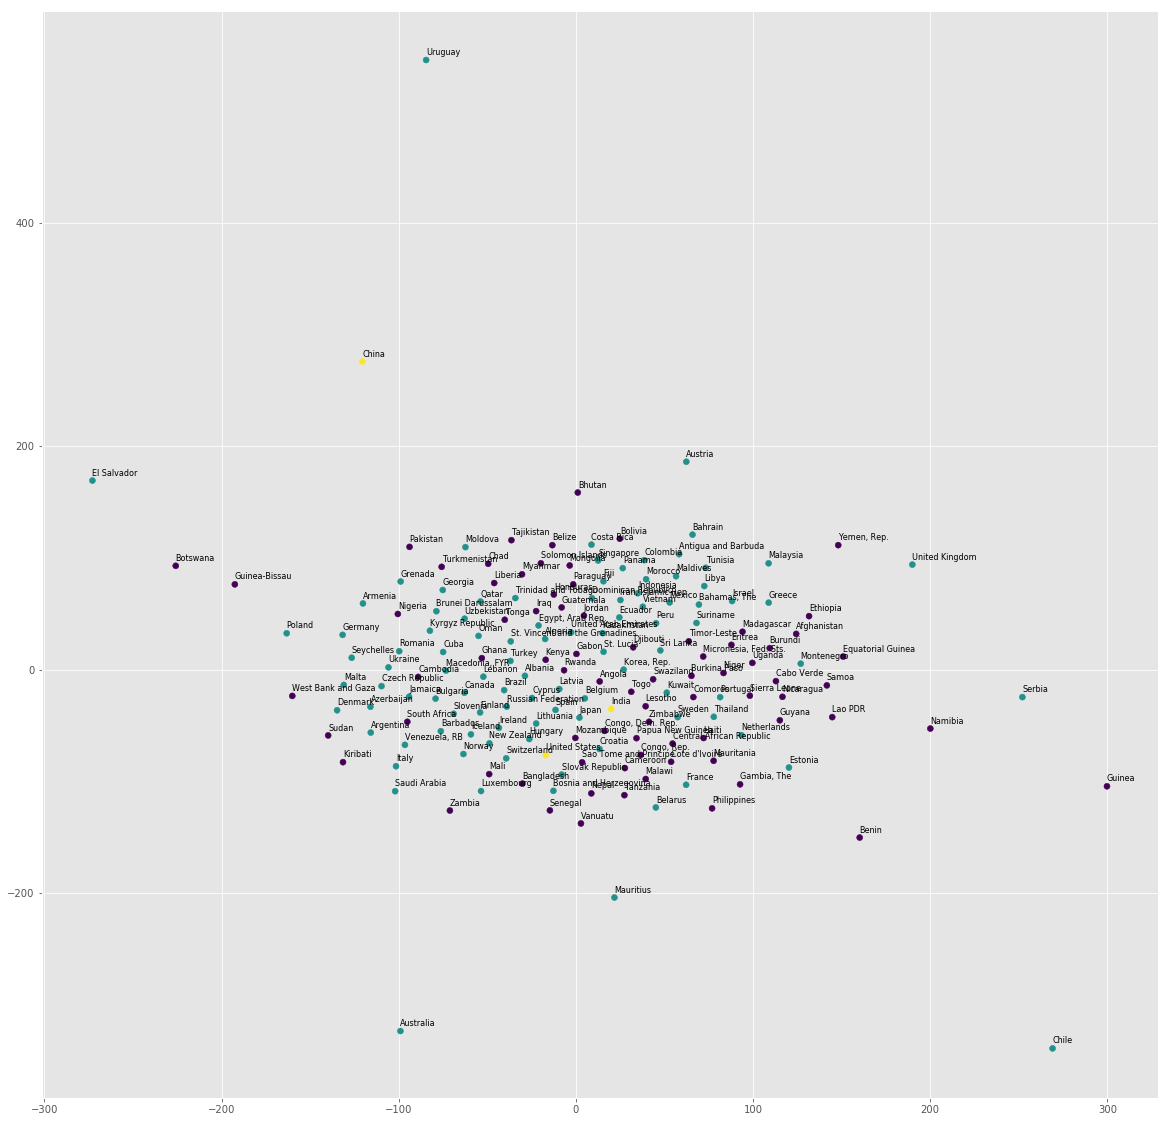

In [49]:
plt.figure(figsize=(20, 20))
plt.scatter(X_embedded[:,0], X_embedded[:, 1], c=df.Type.values)
for i, label in enumerate(df.index):
    plt.annotate(str(label).decode("utf8"), xy=X_embedded[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()


## Задание 4

Страны разделились на:
- Ведущие страны по некоторым критериям - США, Индия, Китай
- страны Европы, Северной Америки и прочие более-менее цивилизованные
- страны Африки и другие страны 3го мира

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.